In [4]:
import importlib
import visualization
importlib.reload(visualization)
from visualization import *
import os

runs/0517/history_dict_failure1_mis_True.pkl
runs/0517/history_dict_failure1_mis_False.pkl
runs/0517/history_dict_failure2_mis_True.pkl
runs/0517/history_dict_failure2_mis_False.pkl
runs/0517/history_dict_random_0.1_0.5_mis_True.pkl
runs/0517/history_dict_random_0.1_0.5_mis_False.pkl
runs/0517/history_dict_polynomial_mis_True.pkl
runs/0517/history_dict_polynomial_mis_False.pkl
runs/0517/history_dict_neural_network_mis_True.pkl
runs/0517/history_dict_neural_network_mis_False.pkl


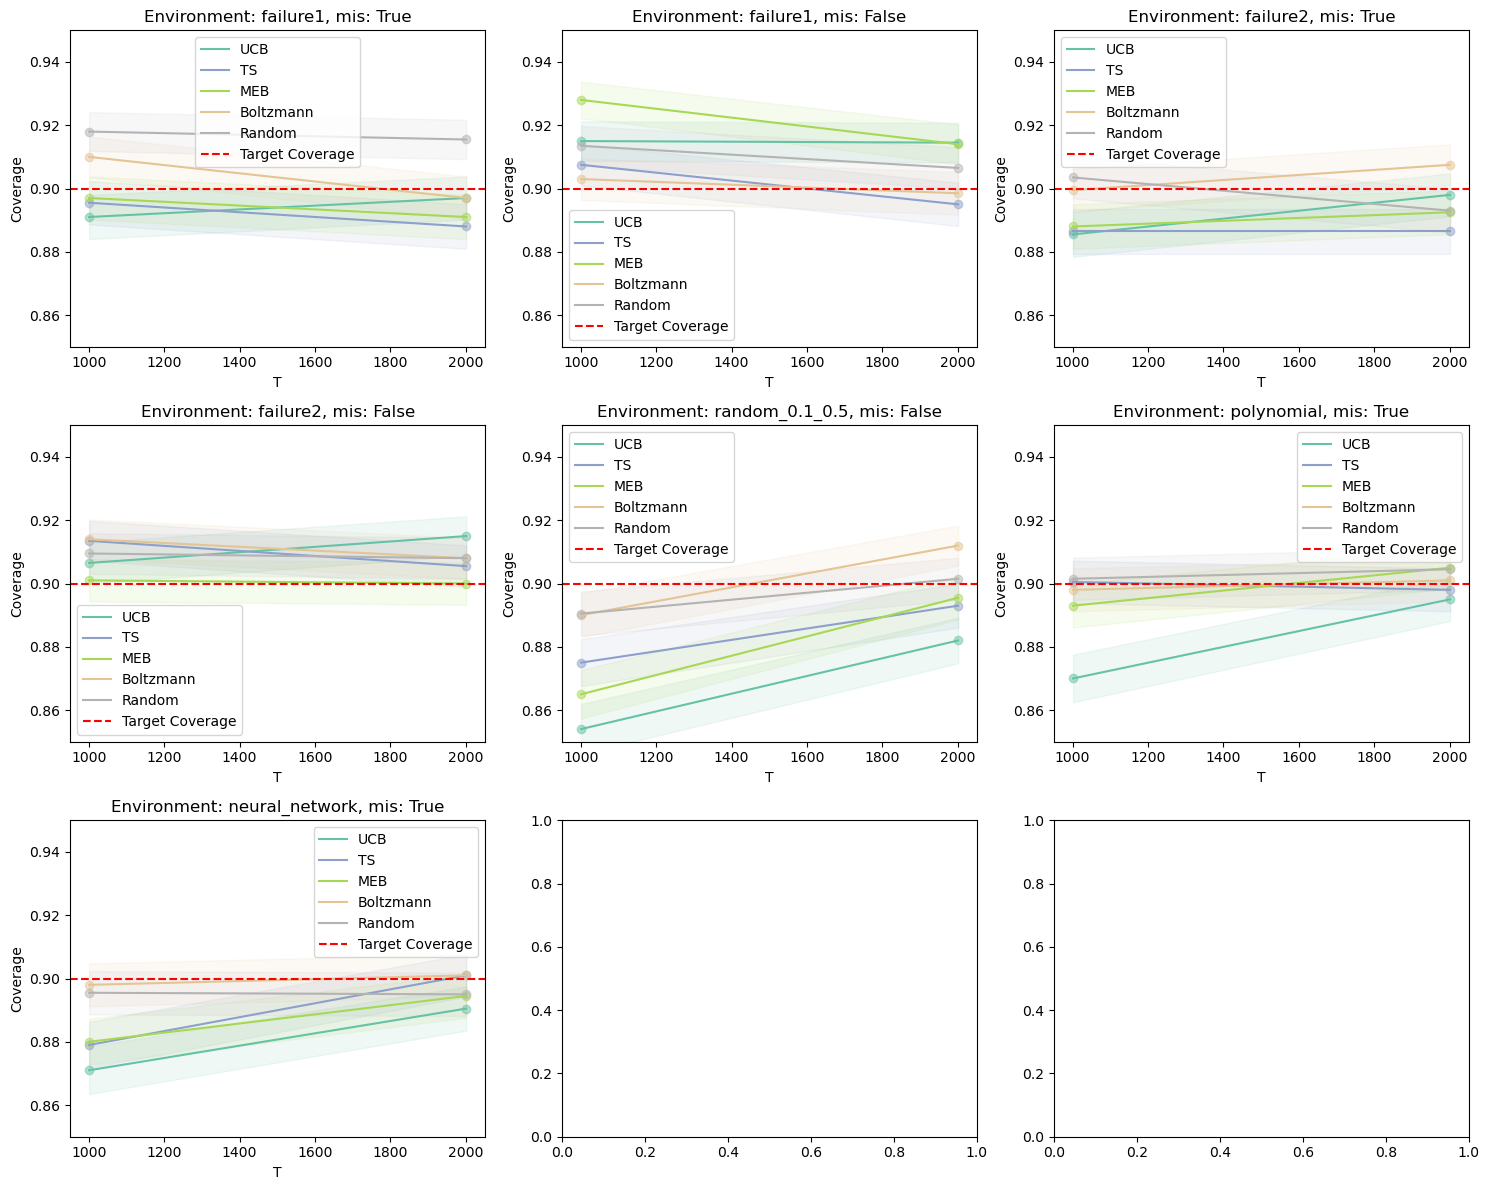

In [ ]:
# test the effects of -l
mis_list = [True, False]
env_list = ['failure1', 'failure2', 'random_0.1_0.5', 'polynomial', 'neural_network']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Counter for subplot position
plot_idx = 0

for env in env_list:
    for mis in mis_list:
        name = f'runs/0517/history_dict_{env}_mis_{mis}.pkl'
        print(name)
        if not os.path.exists(name):
            continue
        with open(name, 'rb') as f:
            history_dict, args = pickle.load(f)
        # Get the current subplot
        ax = axes[plot_idx]
        
        # Pass the axis to plot_coverage
        plot_coverage_w_ax(history_dict, args, ax=ax,alpha=0.9, y_low=0.85, y_high=0.95)
        
        # Add title to each subplot
        ax.set_title(f'Environment: {env}, mis: {mis}')
        
        # Increment plot index
        plot_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()

In [41]:
env = 'failure1'
mis = False
name = f'runs/0517/history_dict_{env}_mis_{mis}.pkl'
print(name)
with open(name, 'rb') as f:
    history_dict, args = pickle.load(f)

runs/0517/history_dict_failure1_mis_False.pkl


In [42]:
history_dict.keys()

dict_keys(['theta_est', 'pi_list', 'theta_est_batch', 'theta_est_naive', 'coverage_list', 'policy_func', 'avg_pa_list', 'var_est_list'])

In [43]:
print(history_dict['theta_est_batch']['MEB'].shape)
print(history_dict['theta_est_batch']['MEB'][0, :, 0])
print(history_dict['theta_est']['MEB'][0, :, -1, 0])


(2000, 2, 1)
[3.08890044 0.92519317]
[3.24053712 0.89349232]


In [45]:
print(history_dict['pi_list']['UCB'].shape)
np.unique(history_dict['pi_list']['UCB'][:, -2, 0], return_counts=True)


(2000, 3, 2)


(array([0.1, 0.9]), array([1338,  662]))